In [1]:
import numpy as np
from hwcomponents import DataStructures as ds 
from hwcomponents import Utils

In [2]:
# Test Neuron datastructure
ds.Neuron(
    param_leak_str=1,
    param_threshold=20,
    param_reset=0,
    state_core=0
)

Neuron For Memory(leak_str=1, threshold=20, reset=0, core=0)

In [3]:
# Test Synapse datastructure
ds.Synapse(
    length=10,
    word_size=np.uint8
)

Synapse For Memory(length=10, weights=[0 0 0 0 0 0 0 0 0 0])

In [4]:
# ex of random neuron generator
def random_neuron() -> ds.Neuron:
    return ds.Neuron(
        param_leak_str=Utils.DiscreteNORM(2**3, 2, 0, 2**5),
        param_threshold=Utils.DiscreteNORM(2**6, 2**3, 0, 2**11),
        state_core=0,
        param_reset=Utils.DiscreteNORM(4., 1., 0, 2**3)
    )

random_neuron()

Neuron For Memory(leak_str=5.0, threshold=79.0, reset=6.0, core=0)

In [5]:
# ex of BRAM with random neurons
from hwcomponents import BRAM as bram

amount_of_neurons = 10
neuron_generator = lambda: random_neuron()

example_bram_for_neurons = bram.Neurons(
    length=amount_of_neurons,
    randomize_fun=neuron_generator
)

for i in range(example_bram_for_neurons.length):
    print(example_bram_for_neurons[i])

Neuron For Memory(leak_str=6.0, threshold=58.0, reset=5.0, core=0)
Neuron For Memory(leak_str=9.0, threshold=73.0, reset=5.0, core=0)
Neuron For Memory(leak_str=8.0, threshold=55.0, reset=6.0, core=0)
Neuron For Memory(leak_str=6.0, threshold=78.0, reset=3.0, core=0)
Neuron For Memory(leak_str=6.0, threshold=57.0, reset=4.0, core=0)
Neuron For Memory(leak_str=9.0, threshold=54.0, reset=3.0, core=0)
Neuron For Memory(leak_str=7.0, threshold=66.0, reset=3.0, core=0)
Neuron For Memory(leak_str=11.0, threshold=75.0, reset=5.0, core=0)
Neuron For Memory(leak_str=7.0, threshold=75.0, reset=3.0, core=0)
Neuron For Memory(leak_str=15.0, threshold=61.0, reset=3.0, core=0)


In [6]:
# ex of random synapse generator
# generate a synapse register for one neuron. 
# in this case it generates a 2-bit synaptic weight (0..3 in decimal)

def random_synapse(depth: int) -> ds.Synapse:
    temp_synapse = ds.Synapse(depth, np.int8)
    for i in range(depth):
        temp_synapse[i] = Utils.DiscreteNORM(0.5, 1., 0, 3)
    return temp_synapse

In [7]:
# ex of BRAM with random synapses, lets make 10 synapses for 10 neurons
from hwcomponents import BRAM as bram
amount_of_synapses = amount_of_neurons = 10

example_of_bram_for_synapses = bram.Synapses(
    length=amount_of_neurons,
    depth=amount_of_synapses,
    word_size=np.int8,
    randomize_fun=random_synapse #the generator function must have a depth parameter
)
for i in range(example_of_bram_for_synapses.length):
    print(example_of_bram_for_synapses[i])

Synapse For Memory(length=10, weights=[1 0 1 1 0 1 1 1 1 2])
Synapse For Memory(length=10, weights=[0 1 0 1 0 1 1 1 0 0])
Synapse For Memory(length=10, weights=[1 1 1 2 1 0 1 0 0 2])
Synapse For Memory(length=10, weights=[2 2 0 1 0 0 2 1 1 1])
Synapse For Memory(length=10, weights=[1 2 0 3 1 2 1 0 0 2])
Synapse For Memory(length=10, weights=[0 0 0 1 0 0 0 1 0 0])
Synapse For Memory(length=10, weights=[0 0 0 1 2 1 0 0 0 1])
Synapse For Memory(length=10, weights=[0 1 2 0 3 1 0 2 1 1])
Synapse For Memory(length=10, weights=[1 1 0 0 0 0 0 0 2 1])
Synapse For Memory(length=10, weights=[0 0 1 0 0 0 0 1 1 1])


In [8]:
# LIF example
from hwcomponents import Neurons as N
active_neuron = N.LIF() # Lif neuron object 

# Update Neuron state, expects a DataStructures.Neuron object
# Lets grab one of the previously generated neurons
neuron_idx, weight_idx = 0, 5

neurons = example_bram_for_neurons
synapses = example_of_bram_for_synapses

active_neuron.change_neuron(neuron=neurons[0])
active_neuron.change_weight(synapses[neuron_idx][weight_idx])
Utils.Print.PrettyNeuron(neurons[0])
print("\nSynapse weight: ", synapses[neuron_idx][weight_idx], "\n")

# Simulate Spike event on input synapse
active_neuron.forward(
    input = 1
)

# Print the updated neuron
Utils.Print.PrettyNeuron(neurons[0])

Neuron state and params: 
 - Leak strength: 	6.0 
 - threshold: 		58.0 
 - reset value: 	5.0 
 - core state: 		0

Synapse weight:  1 

Neuron state and params: 
 - Leak strength: 	6.0 
 - threshold: 		58.0 
 - reset value: 	5.0 
 - core state: 		1


In [9]:
# Lets manage some inputs. They are in the DataStructures namespace
from hwcomponents import DataStructures as ds

# Lets make a random generator
def random_input_sample(length: int) -> np.array:
    return np.array([
        Utils.DiscreteNORM(.1, .5, -1, 1) for _ in range(length)
    ])

# Lets make a random input sample

ex_sample = ds.InputSample(
    length=10,
    randomize_fun=random_input_sample
)

print(ex_sample)

InputSample(input_data=[ 0.  0. -0. -0.  0. -1. -1.  0. -1.  0.])


In [11]:
# We can subclass the InputSample class to make a custom input sample
# We can put our inputsamples into collections
from typing import Callable

def generate_random_samples(
        amount_of_samples: int,
        sample_length: int,
        sample_random_gen: Callable[[int], np.ndarray]
):
    data_collection = ds.InputData() # instantiate the data wrapper
    for _ in range(amount_of_samples):
        data_collection.add_sample(
            ds.InputSample(sample_length, randomize_fun=sample_random_gen)
        )
    return data_collection

test_data = generate_random_samples(10, 10, random_input_sample)

# lets make a heatmap of the data
for i in range(len(test_data)):
    print(test_data[i])


InputSample(input_data=[ 0.  1.  0.  0.  0. -1.  0.  1.  1.  1.])
InputSample(input_data=[-1.  1.  1. -1.  0.  0.  0.  1.  1. -0.])
InputSample(input_data=[ 1.  0.  0.  1.  1.  0.  0. -0.  0.  0.])
InputSample(input_data=[ 0.  0.  0.  0.  1.  0. -0.  0. -0.  1.])
InputSample(input_data=[-0.  0.  1.  1. -0. -0. -1.  1. -0.  1.])
InputSample(input_data=[ 1. -0.  1.  1. -0.  0.  0.  0.  0.  1.])
InputSample(input_data=[ 1.  0. -0.  0. -0. -0.  0. -0.  1.  0.])
InputSample(input_data=[ 1.  0.  1.  1. -0. -0.  0.  0. -0. -0.])
InputSample(input_data=[-0.  1. -0. -0. -1.  0.  1. -0.  0. -0.])
InputSample(input_data=[ 1.  1. -0. -0.  0. -0. -0. -0. -0.  0.])


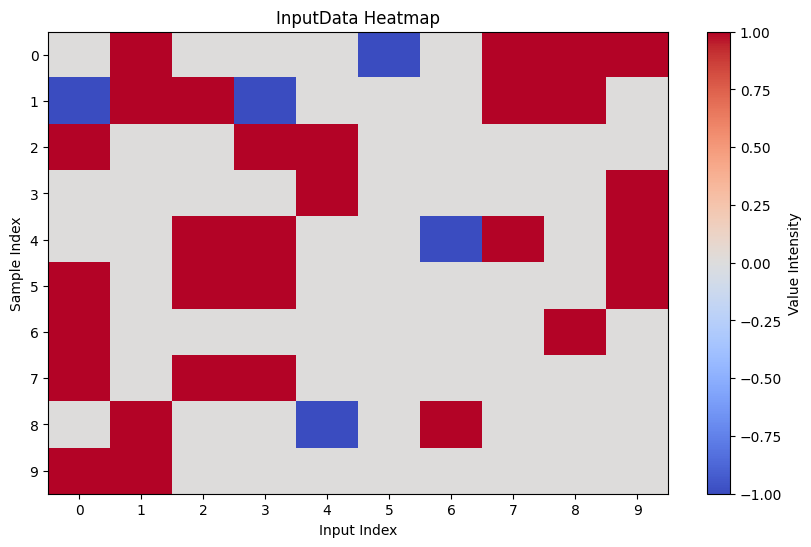

In [12]:
Utils.Plotting.input_data_as_heatmap(test_data)